#三軍總醫院北投分院統計及實驗設計課程之二  
## 2021/6/26
## ytai1123@gmail.com
### 使用方法:


1.   使用gmail帳號登入
2.   按"執行階段" -->"全部執行" 以執行全部內容, 若要個別執行可點選每格程式左方箭頭或按 Control + Enter 鍵執行。

In [1]:
##0-1
!git clone https://github.com/YuehMintTai/RPython.git


Cloning into 'RPython'...


In [5]:
##0-2
!c:\python38\python.exe -m pip install --upgrade pip
!pip install rpy2

kage is not available.
    Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'c:\python38\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sam\\AppData\\Local\\Temp\\pip-install-js8a9a4p\\rpy2_fd139b935da74a33ada48de20a2002b2\\setup.py'"'"'; __file__='"'"'C:\\Users\\sam\\AppData\\Local\\Temp\\pip-install-js8a9a4p\\rpy2_fd139b935da74a33ada48de20a2002b2\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\sam\AppData\Local\Temp\pip-pip-egg-info-144lkn41'
         cwd: C:\Use

In [9]:
!python -m rpy2.situation

rpy2 version:
Traceback (most recent call last):
  File "C:\Python38\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Python38\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Python38\lib\site-packages\rpy2\situation.py", line 140, in <module>
    for row in iter_info():
  File "C:\Python38\lib\site-packages\rpy2\situation.py", line 102, in iter_info
    yield rpy2.__version__
UnboundLocalError: local variable 'rpy2' referenced before assignment


In [10]:
%load_ext rpy2.ipython

ValueError: r_home is None. Try python -m rpy2.situation

In [8]:
##0-3
%%R
myData <- read.csv('RPython/samples.csv')
myData[1,]

UsageError: Line magic function `%%R` not found.


In [ ]:
##2-1
%%R
formula='網路成癮分數YDQ ~ 家庭滿意度apgar'
model1<- glm(formula, myData, family='gaussian')
summary(model1)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5125  -1.8546  -0.8546   1.8138   6.1454  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.51255    0.45740   7.679 8.82e-13 ***
家庭滿意度apgar -0.16580    0.05836  -2.841    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.856059)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1089.2  on 186  degrees of freedom
AIC: 869.8

Number of Fisher Scoring iterations: 2



In [ ]:
##2-2
%%R
formula='網路成癮分數YDQ ~ 性別'
model2 <- glm(formula, myData, family='gaussian')
summary(model2)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4783  -2.4783  -0.4783   1.5217   5.6667  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.6232     0.6066   5.972 1.16e-08 ***
性別         -1.1449     0.5072  -2.258   0.0251 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.947172)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1106.2  on 186  degrees of freedom
AIC: 872.7

Number of Fisher Scoring iterations: 2



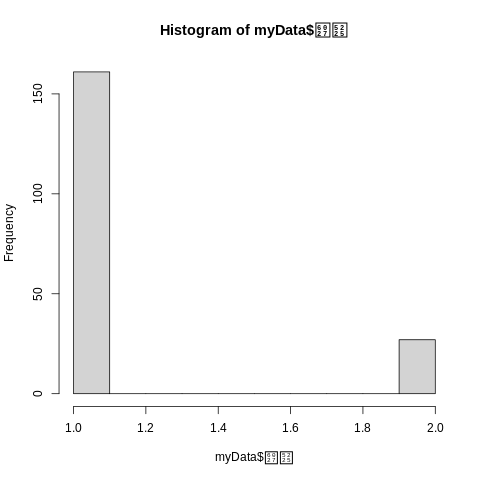

In [ ]:
##2-3
%%R
hist(myData$性別)

In [ ]:
##2-4
%%R
##myData$sex.f<-factor(myData$性別)
##formula='網路成癮分數YDQ ~ sex.f'
formula='網路成癮分數YDQ ~ as.factor(性別)'
model2 <- glm(formula, myData, family='gaussian')
summary(model2)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4783  -2.4783  -0.4783   1.5217   5.6667  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.4783     0.1922  12.895   <2e-16 ***
as.factor(性別)2  -1.1449     0.5072  -2.258   0.0251 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.947172)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1106.2  on 186  degrees of freedom
AIC: 872.7

Number of Fisher Scoring iterations: 2



In [ ]:
##2-5
%%R
myData$性別<-relevel(factor(myData$性別),ref='2')
model3 <- glm(formula, myData, family='gaussian')
summary(model3)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4783  -2.4783  -0.4783   1.5217   5.6667  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)        1.3333     0.4693   2.841   0.0050 **
as.factor(性別)1   1.1449     0.5072   2.258   0.0251 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.947172)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1106.2  on 186  degrees of freedom
AIC: 872.7

Number of Fisher Scoring iterations: 2



In [ ]:
##2-6
%%R
t.test(myData$網路成癮分數YDQ ~ myData$性別)


	Welch Two Sample t-test

data:  myData$網路成癮分數YDQ by myData$性別
t = -2.9195, df = 46.432, p-value = 0.005393
alternative hypothesis: true difference in means between group 2 and group 1 is not equal to 0
95 percent confidence interval:
 -1.9341234 -0.3557317
sample estimates:
mean in group 2 mean in group 1 
       1.333333        2.478261 



In [ ]:
##2-7
%%R
male=subset(myData, 性別==1)$網路成癮分數YDQ
female=subset(myData, 性別==2)$網路成癮分數YDQ
t.test(male,female)


	Welch Two Sample t-test

data:  male and female
t = 2.9195, df = 46.432, p-value = 0.005393
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3557317 1.9341234
sample estimates:
mean of x mean of y 
 2.478261  1.333333 



In [ ]:
##2-7-1使用python stasmodels作t-test
import pandas as pd
from statsmodels.stats.weightstats import ttest_ind
df=pd.read_csv('RPython/samples.csv')
male=df['網路成癮分數YDQ'][df['性別']==1]
female=df['網路成癮分數YDQ'][df['性別']==2]
result=ttest_ind(male,female,alternative='two-sided',usevar='unequal')
result

(2.9194792899491007, 0.00539309754637806, 46.43217543281508)

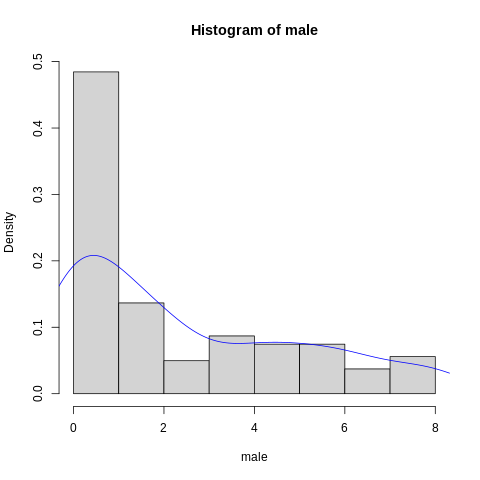

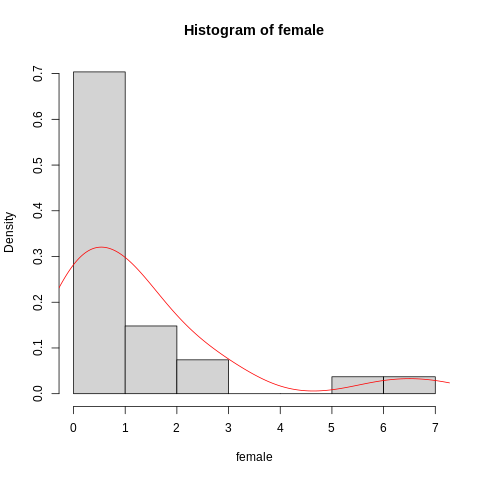

In [ ]:
##2-8
%%R
hist(male, prob=TRUE)
lines(density(male),col='blue')
hist(female, prob=TRUE)
lines(density(female),col='red')

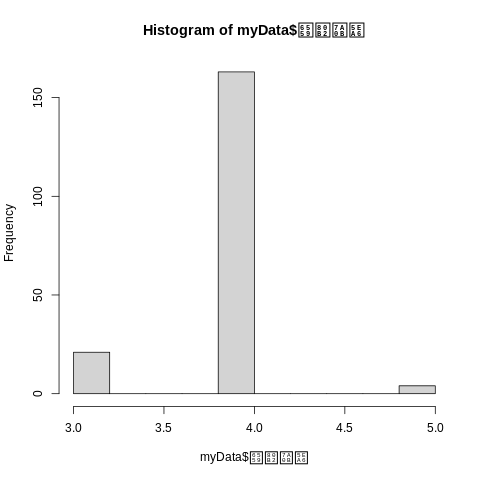

In [ ]:
##2-9
%%R
hist(myData$教育程度)

In [ ]:
##2-10
%%R
formula='網路成癮分數YDQ ~ as.factor(教育程度)'
model2 <- glm(formula, myData, family='gaussian')
summary(model2)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-3.667  -2.178  -1.178   1.822   5.822  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.6667     0.5285   6.937  6.5e-11 ***
as.factor(教育程度)4  -1.4888     0.5615  -2.651  0.00872 ** 
as.factor(教育程度)5  -2.9167     1.3213  -2.207  0.02852 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.866255)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1085.3  on 185  degrees of freedom
AIC: 871.11

Number of Fisher Scoring iterations: 2



In [ ]:
##2-11
%%R
myData$教育程度<-relevel(factor(myData$教育程度),ref='4')
formula='網路成癮分數YDQ ~ as.factor(教育程度)'
model4 <- glm(formula, myData, family='gaussian')
summary(model4)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-3.667  -2.178  -1.178   1.822   5.822  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.1779     0.1897  11.480  < 2e-16 ***
as.factor(教育程度)3   1.4888     0.5615   2.651  0.00872 ** 
as.factor(教育程度)5  -1.4279     1.2258  -1.165  0.24556    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.866255)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1085.3  on 185  degrees of freedom
AIC: 871.11

Number of Fisher Scoring iterations: 2



In [ ]:
##2-12 ##python GLM test 
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula='網路成癮分數YDQ ~ C(教育程度)'
model5=smf.glm(formula,df).fit()
model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              網路成癮分數YDQ   No. Observations:                  188
Model:                            GLM   Df Residuals:                      185
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          5.8663
Method:                          IRLS   Log-Likelihood:                -431.55
Date:                Sat, 26 Jun 2021   Deviance:                       1085.3
Time:                        07:48:54   Pearson chi2:                 1.09e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.6667      0.529      6.937      0.000       2.631       4.703
C(教育程度)[T.4]    -1.4888      0.562     -2.651      0.008      -2.589      -0.388
C(教育程度)[T.5]    -2.9167      1.321     -2.207      0.027      -5.506      -0.327
================================================================================
"""

In [ ]:
##2-13 Simple One-way ANOVA in R
%%R
model6 <- aov(網路成癮分數YDQ ~ as.factor(教育程度),data=myData)
print(summary(model6))
TukeyHSD(model6)

                     Df Sum Sq Mean Sq F value Pr(>F)  
as.factor(教育程度)   2   51.2  25.613   4.366  0.014 *
Residuals           185 1085.3   5.866                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = 網路成癮分數YDQ ~ as.factor(教育程度), data = myData)

$`as.factor(教育程度)`
         diff        lwr       upr     p adj
3-4  1.488753  0.1619682 2.8155369 0.0235826
5-4 -1.427914 -4.3241193 1.4682910 0.4756670
5-3 -2.916667 -6.0386116 0.2052783 0.0725632



In [ ]:
!pip3 install bioinfokit

In [ ]:
##2-14 python anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula='網路成癮分數YDQ ~ C(教育程度)'
model7=ols(formula, df).fit()
anova_table=sm.stats.anova_lm(model7, type=2)
print(anova_table)
from bioinfokit.analys import stat
res=stat()
res.tukey_hsd(df=df,res_var='網路成癮分數YDQ',
              xfac_var='教育程度', 
              anova_model=formula)
res.tukey_summary

             df       sum_sq    mean_sq         F    PR(>F)
C(教育程度)     2.0    51.226885  25.613443  4.366234  0.014033
Residual  185.0  1085.257157   5.866255       NaN       NaN


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,4,3,1.488753,0.161875,2.815630,3.749312,0.023579
1,4,5,1.427914,-1.468494,4.324322,1.647412,0.477314
2,3,5,2.916667,-0.205497,6.038830,3.121699,0.072656
